In this project, we went over how to use the scikit-learn regression model, as well as how to train the regressor using the fit() method, and how to predict new labels using the predict() method. We analyzed a data set consisting of house prices in Boston.

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Importing dataset from scikit learn as well as the linear_model module.

In [4]:
from sklearn.datasets import load_boston

In [5]:
# Load the housing dataset
boston = load_boston()

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

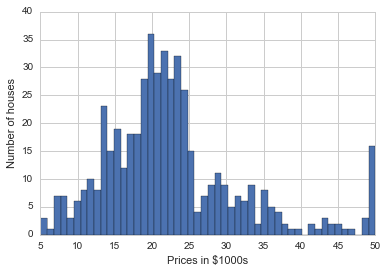

In [7]:
#Histogram of the prices (this is the target of our dataset)
plt.hist(boston.target, bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

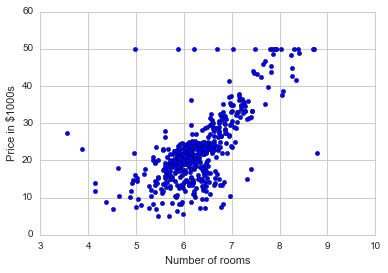

In [8]:
#Scatter plot of one feature, versus the target. In this case, the housing price versus the number of rooms in the dwelling

# Plot the column at the 5 index (Labeled RM)
plt.scatter(boston.data[:,5], boston.target)

#label
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

We can make out a slight trend that price increases along with the number of rooms in that house, which intuitively makes sense! 

In [9]:
# reset data as pandas DataFrame
boston_df = DataFrame(boston.data)

# label columns
boston_df.columns = boston.feature_names

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
#Add the target of the boston data set, the price. We'll create a new column in our DataFrame
boston_df['Price'] = boston.target

In [12]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
boston_df.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
Price        5.00000
dtype: float64

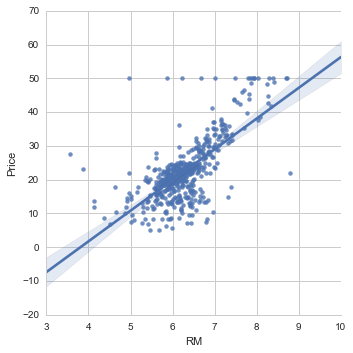

In [14]:
#Use seaborn lmplot function to do a linear fit automatically!
sns.lmplot('RM', 'Price', data=boston_df)

Now, Using Numpy for a Univariate Linear Regression
Numpy has a built in Least Square Method in its linear algebra library. We'll use this first for our Univariate regression and then move on to scikit learn for out Multi variate regression.

In [15]:
# Set up X as median room values
X = boston_df.RM

# Use v to make X two-dimensional
X = np.vstack(boston_df.RM)

In [16]:
X.shape

(506L, 1L)

In [17]:
# Set up Y as the target price of the houses.
Y = boston_df.Price

In [18]:
# Create an array in form [x 1]
X = np.array( [ [value,1] for value in X ] )

X

In [19]:
# Now get out m and b values for our best fit line.We only did our matrix transformations to utilize the numpy least square method.
m, b = np.linalg.lstsq(X,Y)[0]

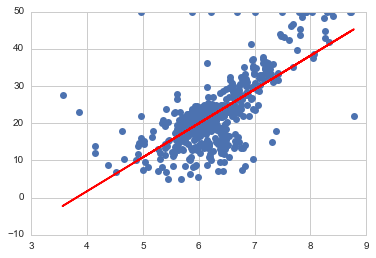

In [20]:
# First the original points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM, boston_df.Price, 'o')
x = boston_df.RM

# Next the best fit line
plt.plot(x, m*x + b,'r',label='Best Fit Line')

let's see how we can get the root mean squared error of the line we just fitted.

In [21]:
# Get the resulting array
result = np.linalg.lstsq(X,Y)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print("The root mean squared error was %.2f " %rmse)

The root mean squared error was 6.60 


The root mean squared error was 6.60 

Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time.

Thus we can reasonably expect a house price to be within $13,200 of our line fit.

Now, Using scikit learn to implement a multivariate regression

In [22]:
# Multivariate Regression

In [23]:
result = np.linalg.lstsq(X,Y)
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print("The root mean squared error was %.2f " %rmse)

The root mean squared error was 6.60 


In [24]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [25]:
# Create a LinearRegression Object
lreg = LinearRegression()

The functions we will be using are:
lreg.fit() which fits a linear model
lreg.predict() which is used to predict Y using the linear model with estimated coefficients
lreg.score() which returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model

In [26]:
# Data Columns
X_multi = boston_df.drop('Price',1)

# Targets
Y_target = boston_df.Price

# Implement Linear Regression
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
#Let's check the intercept and number of coefficients.
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is 36.49 


In [28]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 13 


In [29]:
#Set up a DataFrame showing all the Features and their estimated coefficients obtained form the linear regression.
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [30]:
#Using Training and Validation

# Grab the output and set as X and Y test and train data sets!
Xtrain,Xtest,Ytrain, Ytest = sklearn.cross_validation.train_test_split(X,boston_df.Price)

In [31]:
# Print shapes of the training and testing data sets
print Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

(379L, 2L) (127L, 2L) (379L,) (127L,)


In [32]:
#Predicting Prices
lreg = LinearRegression()

In [33]:
lreg.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
pred_train = lreg.predict(Xtrain)
pred_test = lreg.predict(Xtest)

In [35]:
#Now we will get the mean square error
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Ytrain - pred_train) ** 2))

print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Ytest - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 43.30
Fit a model X_train, and calculate MSE with X_test and Y_test: 45.21


It looks like our mean square error between our training and testing was pretty close. Visualize this using Residual Plots.

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

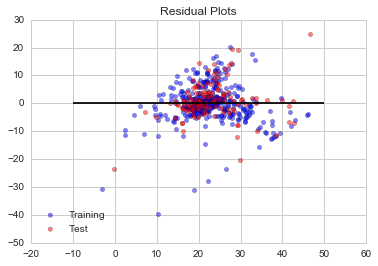

In [36]:
# Scatter plot the training data
train = plt.scatter(pred_train,(pred_train - Ytrain), c= 'b', alpha = 0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test, (pred_test - Ytest), c='r', alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

Looks like there aren't any major patterns to be concerned about, it may be interesting to check out the line occuring towards the bottom right, but overall the majority of the residuals seem to be randomly allocated above and below the horizontal. 